In [2]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load cancer data

In [5]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


# For each cancer get the mutation type for PIK3CA

In [6]:
gene = "PIK3CA"

In [11]:
endo = en.get_genotype_all_vars(gene)
gbm = g.get_genotype_all_vars(gene)
hnscc = hn.get_genotype_all_vars(gene)
ovar = o.get_genotype_all_vars(gene)
cc = c.get_genotype_all_vars(gene)
colon = col.get_genotype_all_vars(gene)
ld = l.get_genotype_all_vars(gene)
brca = b.get_genotype_all_vars(gene)
lscc = ls.get_genotype_all_vars(gene)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 89 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 100 samples for the PIK3CA gene (/Users/hann

In [9]:
def plot_mutations(dflist = None, names_of_df=None, title=None, save_to_path=None):
    number_of_df = len(dflist)
  
    allLabels = []
    for df in dflist:
        #get the labels for each and make a combined label that they'll all use
        mutation = df["Mutation"]
        labels = list(set(mutation))

        allLabels.append(labels)
    
    flat_list = [item for sublist in allLabels for item in sublist]
    all_labels = list(set(flat_list))
    all_labels.sort()
    allLabels = all_labels
    
#     For each df, add na to their labels if it doesn't exist in all_labels
    labels_for_each_df = []
    frequencies_for_each_df = []
    for df in dflist:
        mutation = df["Mutation"].tolist()
        mutationlist = list(set(mutation))
        mutationlist.sort()
        ordered_mut_list = []
        match = True
        mutPosition = 0
        
        for position in range(len(all_labels)):
            try:
                
                if mutationlist[mutPosition] == all_labels[position]:
                    ordered_mut_list.append(mutationlist[mutPosition])
                    mutPosition += 1

                else:
                    ordered_mut_list.append("na")

            except IndexError:  
                ordered_mut_list.append("na")
       
        
        labels_for_each_df.append(ordered_mut_list)

        #get the freq of each mutation type
        freq = []
        for mutation_type in ordered_mut_list:
            freq.append(mutation.count(mutation_type))

        PercentFreq = [x*100 / sum(freq) for x in freq]
        frequencies_for_each_df.append(PercentFreq)
        
        
    #Now plot it using arrays
    width = 0.1
    x = np.arange(len(allLabels))
    a4_dims = (13, 13) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)
    for position in range(0, number_of_df):
        r = ax.bar(x+(width*position), frequencies_for_each_df[position], width,label=names_of_df[position], alpha=.5, linewidth=0)



    ax.set_ylabel('Percent Sample')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(allLabels)
    ax.legend()
    


    plt.setp(ax.get_xticklabels(),rotation='vertical')
    plt.savefig(save_to_path)
    plt.show()
    

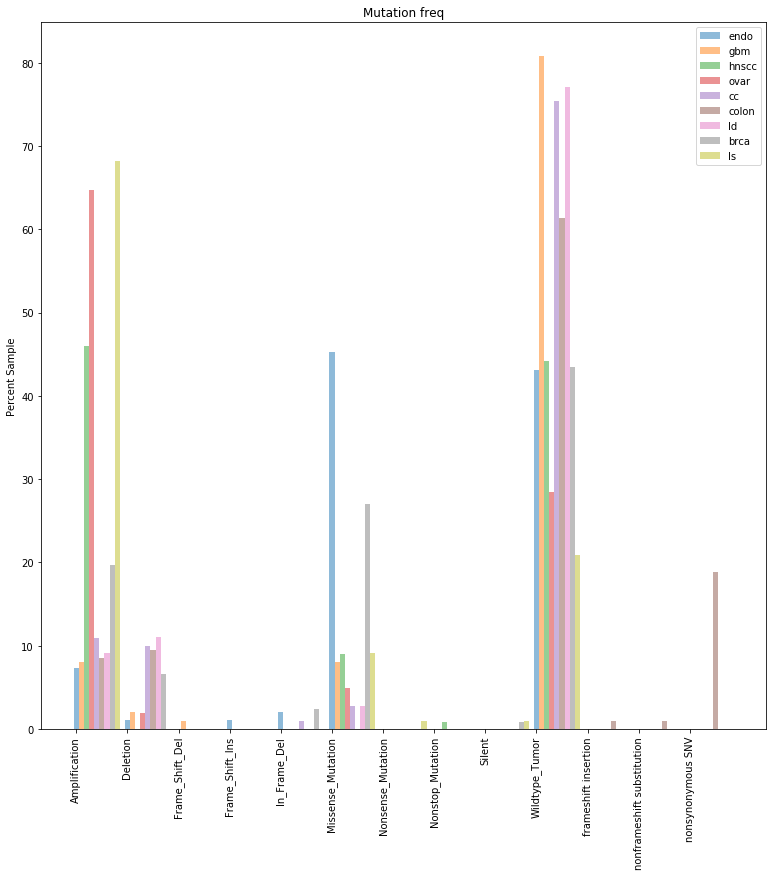

In [14]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['endo', 'gbm', 'hnscc', 'ovar', 'cc', 'colon', 'ld', 'brca', 'ls']
plot_mutations(dfs, names, "Mutation freq", 'step1_PIK3CA.png')